In [1]:
# import modules
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline        
# this is for jupyter notebook only

# 1. Fits I/O

In [2]:
image_file = 'horsehead.fits'

In [3]:
# write image to fits
hdu_list = fits.open(image_file)
hdu_list.writeto('horsehead_new.fits', overwrite=True)

In [4]:
# read fits
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: horsehead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [5]:
# get image header
hdu = hdu_list[0]
header = hdu.header
header   # show header

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

In [6]:
# get image: method 1
image = hdu.data

In [ ]:
# get image: method 2
# use fits.getdata
image = fits.getdata(image_file, 0)  # get primary

In [7]:
print(type(image))
print(image.shape)

<class 'numpy.ndarray'>
(893, 891)


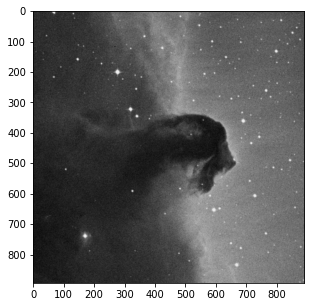

In [8]:
fig = plt.figure(figsize=(5,5))
plt.imshow(image, cmap='gray')
plt.show()

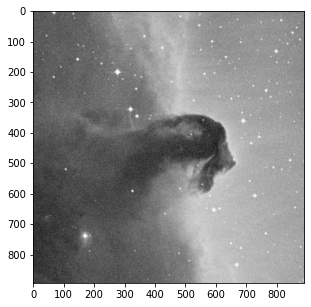

In [9]:
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(5,5))
plt.imshow(image, cmap='gray', norm=LogNorm())
plt.show()

# 2. Manipulate

In [10]:
# find max and min
print('max:', np.max(image))
print('min:', np.min(image))

max: 22918
min: 3759


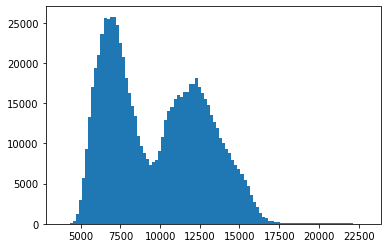

In [11]:
# histogram
plt.hist(image.flatten(), bins=100)
plt.show()

# 3. Coordinate

In [12]:
from astropy.wcs import WCS

In [13]:
wcs = WCS(header)
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 85.59941666666666  -4.946638888888889  
CRPIX : -716.333144294269  -8444.64946698226  
PC1_1 PC1_2  : 0.015029018460682027  -9.63735777657198e-06  
PC2_1 PC2_2  : 1.0548917307845708e-05  0.015000473845055023  
CDELT : -0.018654788242111486  0.018654788242111486  
NAXIS : 891  893

### pixel and sky coordinate
The last parameter to the two above examples is the ‘origin’ parameter. It is a flag that tells WCS if you indexes should be 0-based (like numpy) or 1-based (like FITS). Here we are using 0 as we want to convert to and from indexes of the numpy array.

In [14]:
wcs.wcs_pix2world([[300, 300]], 0)

array([[85.31563231, -2.49919108]])

In [15]:
wcs.wcs_world2pix([[85.31563231, -2.49919108]], 0)

array([[300.00000319, 299.99999846]])

### figure with coordinate

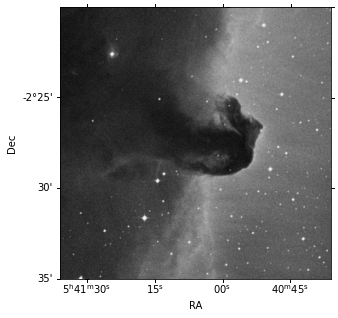

In [16]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111, projection=wcs)
ax.imshow(image, cmap='gray')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')

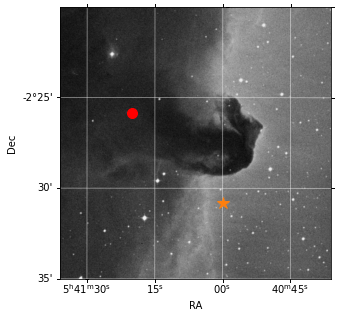

In [17]:
from astropy.coordinates import SkyCoord

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111, projection=wcs)
ax.imshow(image, cmap='gray')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')

# add grid
ax.coords.grid(color='white', alpha=0.5, linestyle='solid')

# plot dots 1
ax.plot_coord(SkyCoord("5h41m20s -2d25m50s"), "o", c='red', ms=10)

# plot dots 2
sky = SkyCoord("5h41m00s -2d30m50s")
ax.plot(sky.ra, sky.dec, "*", transform=ax.get_transform('icrs'), c='#ff7f0e', ms=12)